In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/DL_Projects/MSRC-V2/

/content/drive/MyDrive/DL_Projects/MSRC-V2


In [3]:
import os
from data.download_utils import download_dataset
to = '/content/drive/MyDrive/DL_Projects/Datasets/'
url = 'https://i2dl.vc.in.tum.de/static/data/segmentation_data.zip'
download_dataset(url,to,'MSRC-V2.zip')


KeyboardInterrupt: 

In [3]:
# prompt: inspect what '/content/drive/MyDrive/DL_Projects/Datasets/MSRC-V2/' contains

import os
print(os.listdir('/content/drive/MyDrive/DL_Projects/Datasets/MSRC-V2/segmentation_data/targets'))

['8_21_s_GT.bmp', '8_20_s_GT.bmp', '8_8_s_GT.bmp', '8_9_s_GT.bmp', '16_26_s_GT.bmp', '16_27_s_GT.bmp', '15_15_s_GT.bmp', '10_7_s_GT.bmp', '3_25_s_GT.bmp', '3_24_s_GT.bmp', '15_14_s_GT.bmp', '10_6_s_GT.bmp', '14_29_s_GT.bmp', '2_19_s_GT.bmp', '14_28_s_GT.bmp', 'Thumbs.db', '3_6_s_GT.bmp', '9_23_s_GT.bmp', '9_22_s_GT.bmp', '16_18_s_GT.bmp', '16_19_s_GT.bmp', '17_24_s_GT.bmp', '17_25_s_GT.bmp', '1_15_s_GT.bmp', '2_27_s_GT.bmp', '14_16_s_GT.bmp', '16_3_s_GT.bmp', '16_2_s_GT.bmp', '1_20_s_GT.bmp', '17_10_s_GT.bmp', '17_11_s_GT.bmp', '1_21_s_GT.bmp', '14_23_s_GT.bmp', '2_13_s_GT.bmp', '2_12_s_GT.bmp', '14_22_s_GT.bmp', '8_2_s_GT.bmp', '8_3_s_GT.bmp', '13_30_s_GT.bmp', '5_8_s_GT.bmp', '5_9_s_GT.bmp', '9_16_s_GT.bmp', '16_9_s_GT.bmp', '17_1_s_GT.bmp', '15_21_s_GT.bmp', '3_11_s_GT.bmp', '3_10_s_GT.bmp', '15_20_s_GT.bmp', '2_4_s_GT.bmp', '8_15_s_GT.bmp', '2_5_s_GT.bmp', '8_14_s_GT.bmp', '9_29_s_GT.bmp', '7_30_s_GT.bmp', '9_28_s_GT.bmp', '12_32_s_GT.bmp', '19_14_s_GT.bmp', '16_30_s_GT.bmp', '14_5

In [ ]:
from IPython.display import HTML
with open('/content/drive/MyDrive/DL_Projects/Datasets/MSRC-V2/segmentation_data/info.html', 'r') as f:
    html_string = f.read()
HTML(html_string)

object class,R,G,B,Colour
void,0,0,0,
building,128,0,0,
grass,0,128,0,
tree,128,128,0,
cow,0,0,128,
horse,128,0,128,
sheep,0,128,128,
sky,128,128,128,
mountain,64,0,0,
aeroplane,192,0,0,


In [5]:
import os
import matplotlib.pyplot as plt
import cv2  # For reading images


In [6]:
base_path = '/content/drive/MyDrive/DL_Projects/Datasets/MSRC-V2/segmentation_data'
images_path = os.path.join(base_path, 'images')
targets_path = os.path.join(base_path, 'targets')


In [7]:
# Define the paths for the .txt files
train_file = '/content/drive/MyDrive/DL_Projects/Datasets/MSRC-V2/segmentation_data/train.txt'
val_file = '/content/drive/MyDrive/DL_Projects/Datasets/MSRC-V2/segmentation_data/val.txt'
test_file = '/content/drive/MyDrive/DL_Projects/Datasets/MSRC-V2/segmentation_data/test.txt'

# Function to read and print the first few lines of each file
def preview_file(filepath, num_lines=5):
    with open(filepath, 'r') as file:
        lines = file.readlines()
        print(f"Preview of {os.path.basename(filepath)}:")
        print("".join(lines[:num_lines]))  # Print the first few lines
        print("\n---\n")

# Preview each file
preview_file(train_file)
preview_file(val_file)
preview_file(test_file)
# Function to count lines in a file
def count_samples(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return len(lines)

# Get the number of samples in each split
train_count = count_samples(train_file)
val_count = count_samples(val_file)
test_count = count_samples(test_file)

# Print the results
print(f"Number of samples in train.txt: {train_count}")
print(f"Number of samples in val.txt: {val_count}")
print(f"Number of samples in test.txt: {test_count}")


Preview of train.txt:
11_16_s.bmp
11_27_s.bmp
11_12_s.bmp
12_34_s.bmp
11_2_s.bmp


---

Preview of val.txt:
18_14_s.bmp
15_8_s.bmp
18_1_s.bmp
18_10_s.bmp
15_9_s.bmp


---

Preview of test.txt:
17_25_s.bmp
14_16_s.bmp
4_15_s.bmp
14_28_s.bmp
7_10_s.bmp


---

Number of samples in train.txt: 276
Number of samples in val.txt: 59
Number of samples in test.txt: 56


In [8]:
objects = {
    'void': [0, 0, 0], 'building': [128,0,0],
    'grass': [0,128,0], 'tree': [128,128,0],
    'cow': [0,0,128], 'horse': [128,0,128],
    'sheep': [0,128,128], 'sky': [128,128,128],
    'mountain': [64,0,0], 'aeroplane': [192,0,0],
    'water': [64,128,0], 'face': [192,128,0],
    'car': [64,0,128], 'bicycle': [192,0,128],
    'flower': [64,128,128], 'sign':[192,128,128],
    'bird': [0,64,0], 'book': [128,64,0],
    'chair': [0,192,0], 'road': [128,64,128],
    'cat': [0,192,128], 'dog': [128,192,128],
    'body': [64,64,0], 'boat': [192,64,0]

}

In [9]:
print(objects['mountain'])

[64, 0, 0]


In [10]:
def get_key(dict, value):
  for key in dict.keys():
    if dict[key] == value:
      return key
  return "key doesn't exist"

In [11]:
name = get_key(objects, [128,128,128])
print(name)

sky


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def plot_image_and_target(image_path, target_path):
    # Load and prepare the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load and prepare the target mask
    target = cv2.imread(target_path)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    # Find unique colors (representing classes) in the target mask
    unique_colors = np.unique(target.reshape(-1, target.shape[2]), axis=0) #-1 means to flatten dimensions

    # Map colors to object classes
    obj = []
    for color in unique_colors:
        objct = get_key(objects, color.tolist())
        if objct not in obj and objct != 'void':
            obj.append(objct)

    # Plot the image and the target mask
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(target)
    plt.title(f"Targets: {', '.join(obj)}")
    plt.axis('off')

    plt.show()

392 392


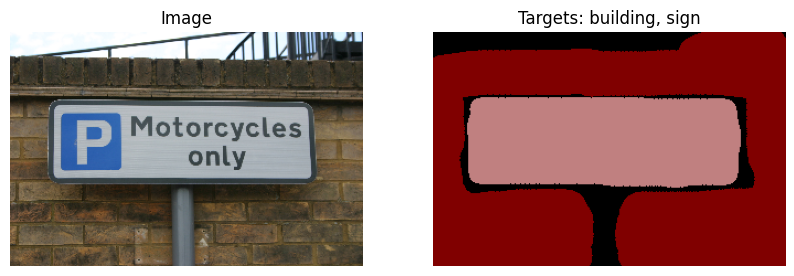

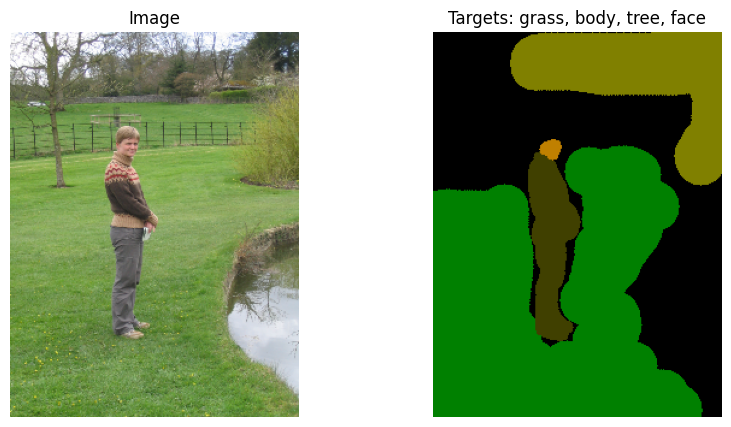

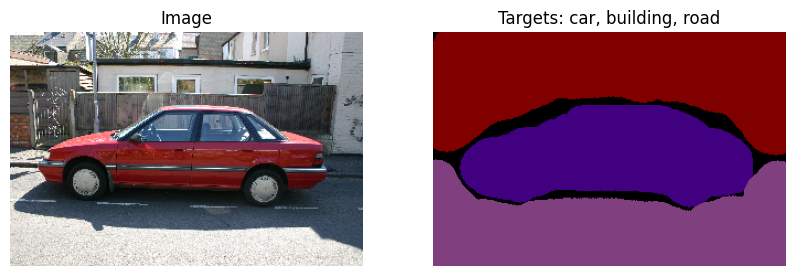

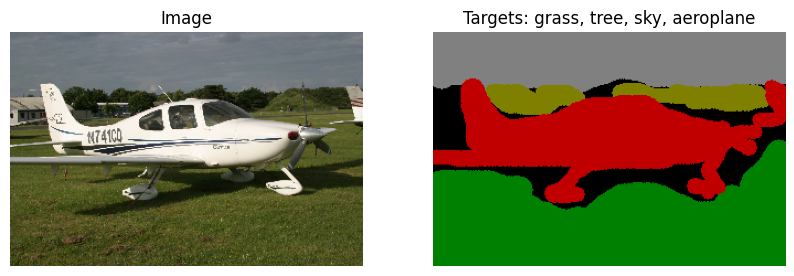

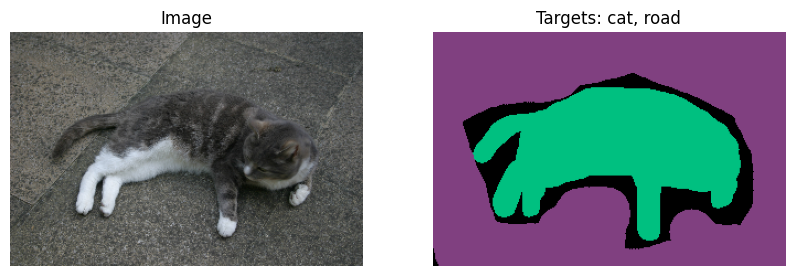

In [13]:
import random

# List all images and target masks
image_files = sorted(os.listdir(images_path))
target_files = sorted(os.listdir(targets_path))
print(len(image_files),len(target_files))
# Pick a few random indices for visualization
sample_indices = random.sample(range(len(image_files)), 5)  # You can adjust the sample size

for idx in sample_indices:
    image_path = os.path.join(images_path, image_files[idx])
    target_path = os.path.join(targets_path, target_files[idx])

    plot_image_and_target(image_path, target_path)

In [4]:
objects = {
    'void': (0,0,0), 'building': (128,0,0),
    'grass': (0,128,0), 'tree': (128,128,0),
    'cow': (0,0,128), 'horse': (128,0,128),
    'sheep': (0,128,128), 'sky': (128,128,128),
    'mountain': (64,0,0), 'aeroplane': (192,0,0),
    'water': (64,128,0), 'face': (192,128,0),
    'car': (64,0,128), 'bicycle': (192,0,128),
    'flower': (64,128,128), 'sign':(192,128,128),
    'bird': (0,64,0), 'book': (128,64,0),
    'chair': (0,192,0), 'road': (128,64,128),
    'cat': (0,192,128), 'dog': (128,192,128),
    'body': (64,64,0), 'boat': (192,64,0)

}

In [5]:
%load_ext autoreload
%autoreload 2

In [17]:
from data.MSRCV2_dataset import MSRCv2Dataset
import torchvision
from torchvision import transforms
Dataset = MSRCv2Dataset(
    transform = transforms.Compose([
        transforms.ToTensor(),#transforms.RandomHorizontalFlip(p=0.5)
    ]),
    force_download =  False,
    filename = 'MSRC-V2',
    root = '/content/drive/MyDrive/DL_Projects/Datasets',
    download_url = "https://i2dl.vc.in.tum.de/static/data/segmentation_data.zip",
    cache = False

)


Extracting Images and Targets...


KeyboardInterrupt: 

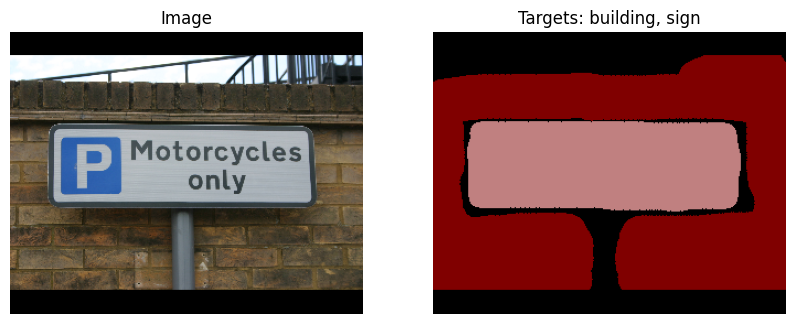

In [7]:
Dataset.plot(10)

335


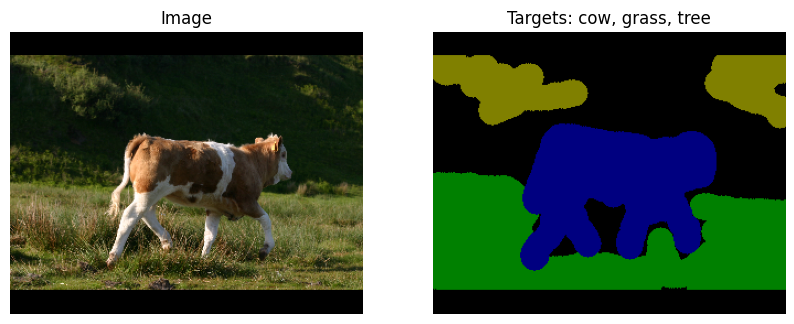

In [8]:
print(len(Dataset))
Dataset.plot(186)

In [9]:
Dataset[9]['target']

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])

sign: 18 occurrences
tree: 81 occurrences
bird: 21 occurrences
grass: 122 occurrences
road: 87 occurrences
dog: 17 occurrences
cat: 14 occurrences
bicycle: 18 occurrences
sky: 90 occurrences
building: 84 occurrences
water: 42 occurrences
sheep: 19 occurrences
body: 38 occurrences
face: 33 occurrences
boat: 18 occurrences
cow: 26 occurrences
chair: 17 occurrences
aeroplane: 17 occurrences
mountain: 17 occurrences
car: 25 occurrences
flower: 20 occurrences
book: 20 occurrences


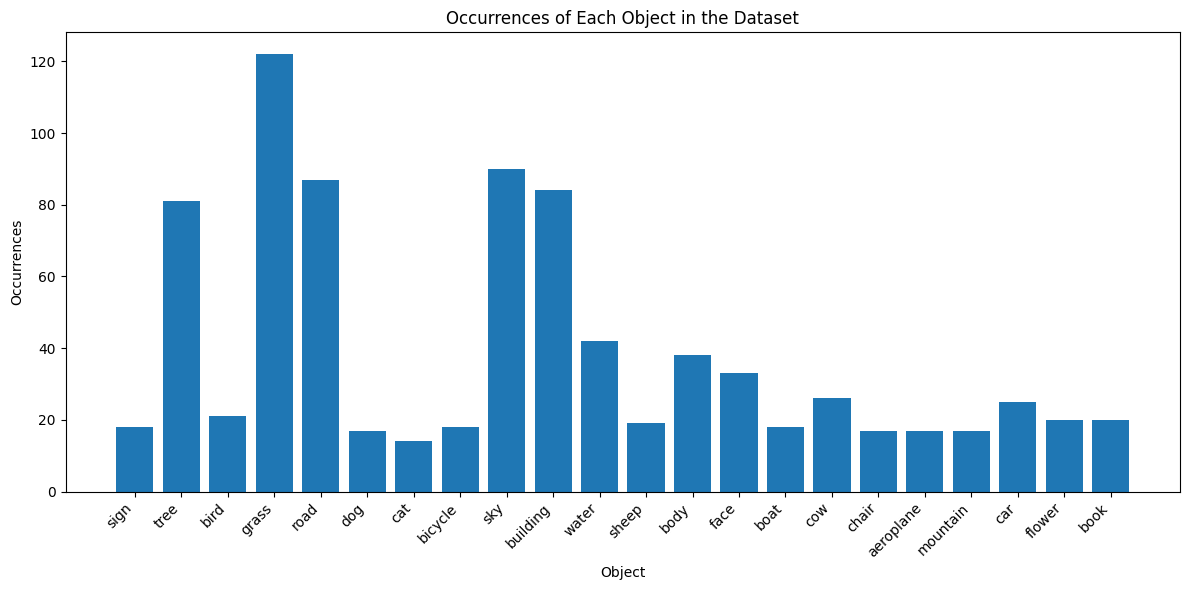

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

# Collect objects from each target in the dataset
objects = []
for i in range(len(Dataset)):
    target = Dataset.map_indices_rgb(Dataset.Targets[i])
    objects.extend(Dataset.get_target_obj(target))

# Count occurrences of each object
object_counts = Counter(objects)

# Display the results
for obj, count in object_counts.items():
    print(f"{obj}: {count} occurrences")

# Create a histogram
objects = list(object_counts.keys())
counts = list(object_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(objects, counts)
plt.xlabel('Object')
plt.ylabel('Occurrences')
plt.title('Occurrences of Each Object in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


void: 85168747 pixels
sign: 3819483 pixels
tree: 4610629 pixels
bird: 2553207 pixels
grass: 17229425 pixels
road: 10178103 pixels
dog: 3125843 pixels
cat: 5606616 pixels
bicycle: 4912715 pixels
sky: 6842965 pixels
building: 9236105 pixels
water: 7547127 pixels
sheep: 4341348 pixels
body: 2044493 pixels
face: 2177544 pixels
boat: 1601340 pixels
cow: 3370940 pixels
chair: 3419938 pixels
aeroplane: 2923052 pixels
mountain: 1571290 pixels
car: 6137531 pixels
flower: 3831499 pixels
book: 7307180 pixels


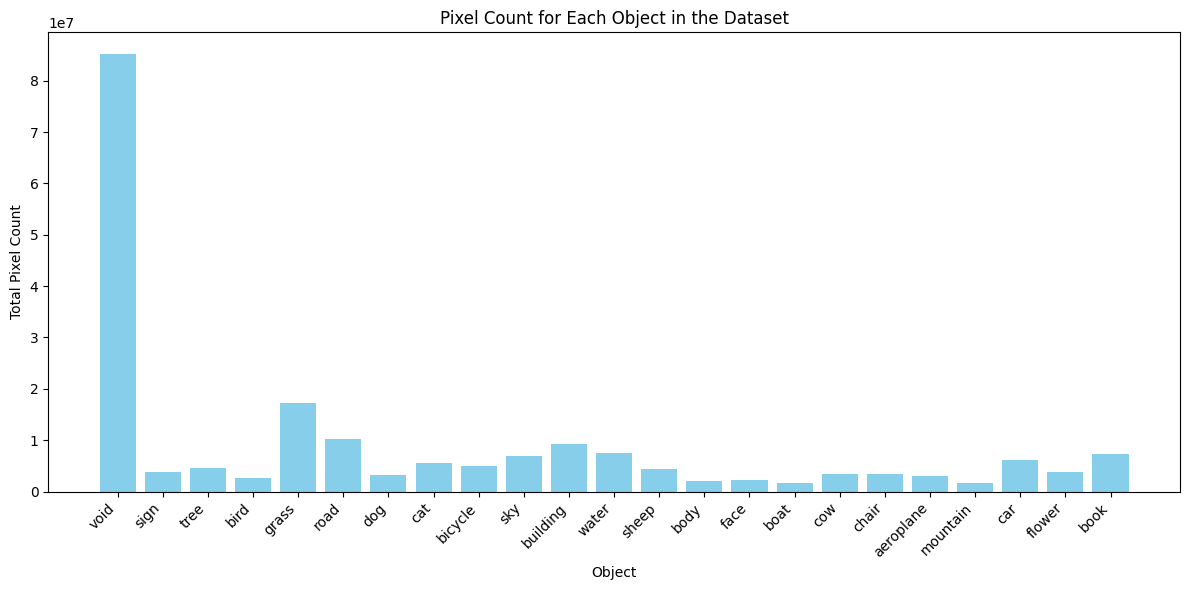

In [22]:
import numpy as np
def count_pixels_per_object(Dataset):
        """
        Count the total number of pixels each object class represents in the dataset's target masks.

        Returns:
            pixel_counts (dict): A dictionary with object names as keys and pixel counts as values.
        """
        pixel_counts = Counter()  # Initialize a counter to store pixel counts for each object

        for target in Dataset.Targets:
            # Reshape to list all pixel values as rows of colors
            target = Dataset.map_indices_rgb(target)
            pixels = target.reshape(-1, target.shape[2])

            # Count each unique color (representing an object class) in the current target mask
            for color in np.unique(pixels, axis=0):
                color_list = color.tolist()  # Convert color to a list for lookup
                obj_name = Dataset.get_key(Dataset.objects, color_list)

                if obj_name:  # Ignore 'void' and only count known objects
                    count = np.sum((pixels == color).all(axis=1))  # Count pixels matching the color
                    pixel_counts[obj_name] += count  # Add to the total count for this object

        return dict(pixel_counts)

# Count pixels per object
pixel_counts = count_pixels_per_object(Dataset)

# Display the results
for obj, count in pixel_counts.items():
    print(f"{obj}: {count} pixels")

# Plot the histogram
objects = list(pixel_counts.keys())
counts = list(pixel_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(objects, counts, color='skyblue')
plt.xlabel('Object')
plt.ylabel('Total Pixel Count')
plt.title('Pixel Count for Each Object in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

Height Statistics:
Mean: 256.0
Median: 256.0
Min: 256
Max: 256

Width Statistics:
Mean: 320.0
Median: 320.0
Min: 320
Max: 320


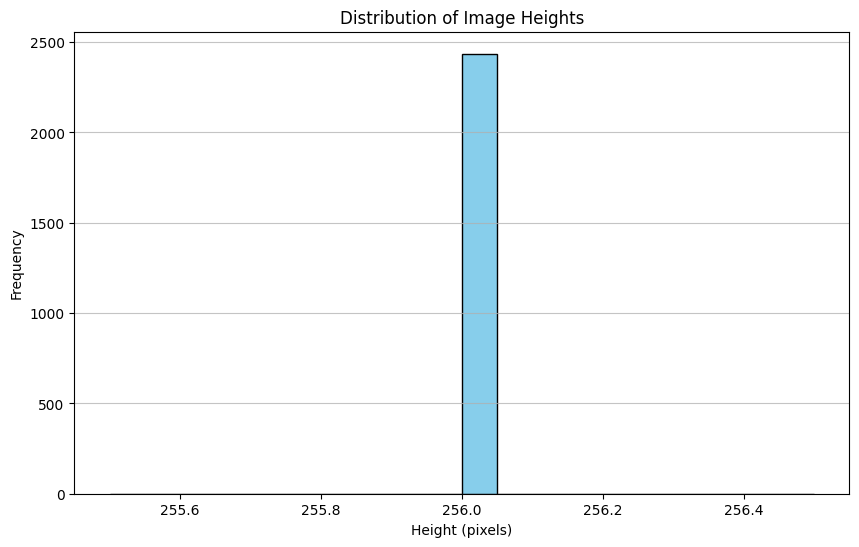

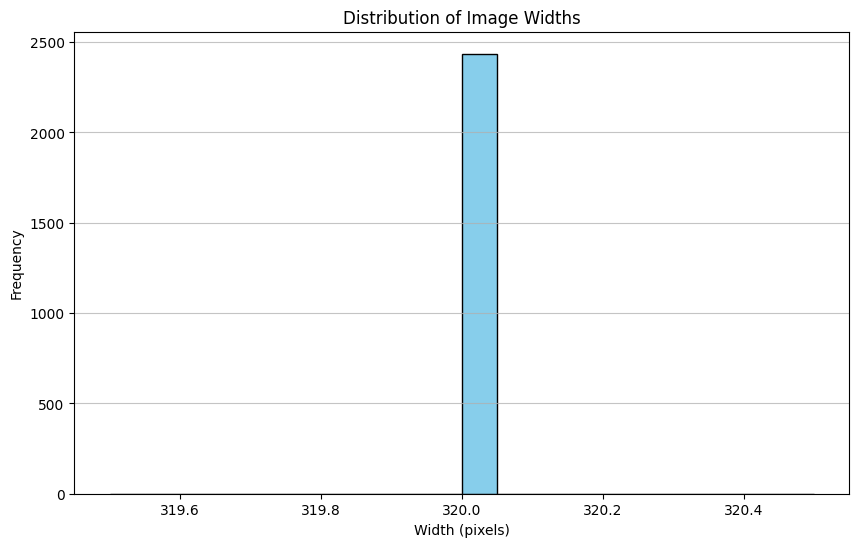

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_heights_widths(dataset):
    heights = []
    widths = []

    for image in dataset.Images:
        height, width = image.shape[:2]
        heights.append(height)
        widths.append(width)

    return heights, widths

def compute_statistics(data):
    stats = {
        'mean': np.mean(data),
        'median': np.median(data),
        'min': np.min(data),
        'max': np.max(data)
    }
    return stats

def plot_histogram(data, title, xlabel):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Assuming 'Dataset' is your dataset object
heights, widths = calculate_heights_widths(Dataset)

# Compute statistics
height_stats = compute_statistics(heights)
width_stats = compute_statistics(widths)

# Display the statistics
print("Height Statistics:")
for key, value in height_stats.items():
    print(f"{key.capitalize()}: {value}")

print("\nWidth Statistics:")
for key, value in width_stats.items():
    print(f"{key.capitalize()}: {value}")

# Plot histograms
plot_histogram(heights, 'Distribution of Image Heights', 'Height (pixels)')
plot_histogram(widths, 'Distribution of Image Widths', 'Width (pixels)')
